In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import unicodedata
import geopandas as gpd
import get_data
import mapclassify
import contextily as ctx
import numpy as np

In [38]:
from tempfile import NamedTemporaryFile
import urllib.request
import matplotlib.font_manager as fm
# Font Imports
# heading_font = fm.FontProperties(fname='/home/ats4i/playfair-display/PlayfairDisplay-Regular.ttf', size=24)
# subtitle_font = fm.FontProperties(fname='/home/ats4i/Roboto/Roboto-Regular.ttf', size=16)

github_url = 'https://github.com/google/fonts/blob/master/ofl/playfairdisplay/static/PlayfairDisplay-Regular.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
heading_font = fm.FontProperties(fname=f.name, size=24)

github_url = 'https://github.com/google/fonts/blob/master/ofl/roboto/static/Roboto-Regular.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
subtitle_font = fm.FontProperties(fname=f.name, size=16)

In [39]:
get_data.get_data()

Baixando arquivos brasil.io...


In [40]:
df = pd.read_csv("data/dados_total_estados.csv")
df = df[df.state != "Indefinido"]
df.index=df['index']
df = df.drop('index', 1)
df



,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,popEst,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
index,,,,,,,,,,,,
0,2020-07-06,AP,TOTAL,state,30004,449,108,True,845731.0,16.0,3547.70016,0.0150
1,2020-07-05,AP,TOTAL,state,29883,442,107,False,845731.0,16.0,3533.39301,0.0148
2,2020-07-04,AP,TOTAL,state,29809,441,106,False,845731.0,16.0,3524.64318,0.0148
3,2020-07-03,AP,TOTAL,state,29574,438,105,False,845731.0,16.0,3496.85657,0.0148
4,2020-07-02,AP,TOTAL,state,29153,427,104,False,845731.0,16.0,3447.07714,0.0146
...,...,...,...,...,...,...,...,...,...,...,...,...
272683,2020-02-29,SP,TOTAL,state,2,0,5,False,45919049.0,35.0,0.00436,0.0000
272684,2020-02-28,SP,TOTAL,state,2,0,4,False,45919049.0,35.0,0.00436,0.0000
272685,2020-02-27,SP,TOTAL,state,1,0,3,False,45919049.0,35.0,0.00218,0.0000


In [41]:
def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

# States

In [42]:
# Set filepath
fp = "br_unidades_da_federacao/BRUFE250GC_SIR.shp"

# Read file using gpd.read_file()
dataSaude = gpd.read_file(fp)
dataSaude

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
0,ACRE,NORTE,12,"POLYGON ((-73.18253 -7.33550, -73.05413 -7.381..."
1,ALAGOAS,NORDESTE,27,"POLYGON ((-35.46659 -8.81764, -35.46658 -8.817..."
2,AMAPÁ,NORTE,16,"MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1..."
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-38.65484 -18.04242, -38.65819..."
4,CEARÁ,NORDESTE,23,"POLYGON ((-40.49717 -2.78451, -40.49173 -2.788..."
5,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-48.05328 -15.50026, -48.03611 -15.5..."
6,ESPÍRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-40.39595 -20.62216, -40.39617..."
7,GOIÁS,CENTRO-OESTE,52,"POLYGON ((-50.16015 -12.42007, -50.15836 -12.4..."
8,MARANHÃO,NORDESTE,21,"MULTIPOLYGON (((-43.99913 -2.39272, -43.99937 ..."
9,MATO GROSSO,CENTRO-OESTE,51,"POLYGON ((-57.93439 -7.65677, -57.93044 -7.657..."


In [43]:
dataSaude = dataSaude.to_crs(epsg=3857)

In [44]:
states=dataSaude.NM_ESTADO.values
display(states)

for i in range(0,len(dataSaude.index)):
    dataSaude.iloc[i,0] = strip_accents(dataSaude.iloc[i,0])
    
display(dataSaude.head(17))

array(['ACRE', 'ALAGOAS', 'AMAPÁ', 'BAHIA', 'CEARÁ', 'DISTRITO FEDERAL',
       'ESPÍRITO SANTO', 'GOIÁS', 'MARANHÃO', 'MATO GROSSO',
       'MATO GROSSO DO SUL', 'MINAS GERAIS', 'PARÁ', 'PARAÍBA',
       'PERNAMBUCO', 'PIAUÍ', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE',
       'RIO GRANDE DO SUL', 'RORAIMA', 'SANTA CATARINA', 'SÃO PAULO',
       'SERGIPE', 'TOCANTINS', 'PARANÁ', 'RONDÔNIA', 'AMAZONAS'],
      dtype=object)

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
0,ACRE,NORTE,12,"POLYGON ((-8146641.462 -818823.730, -8132349.0..."
1,ALAGOAS,NORDESTE,27,"POLYGON ((-3948122.488 -985472.482, -3948122.1..."
2,AMAPA,NORTE,16,"MULTIPOLYGON (((-5586148.480 211655.546, -5585..."
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-4303036.945 -2042514.177, -43..."
4,CEARA,NORDESTE,23,"POLYGON ((-4508124.507 -310092.251, -4507518.7..."
5,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-5349266.664 -1746921.064, -5347355...."
6,ESPIRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-4496856.046 -2346881.963, -44..."
7,GOIAS,CENTRO-OESTE,52,"POLYGON ((-5583801.974 -1393553.197, -5583603...."
8,MARANHAO,NORDESTE,21,"MULTIPOLYGON (((-4897960.719 -266433.409, -489..."
9,MATO GROSSO,CENTRO-OESTE,51,"POLYGON ((-6449226.491 -854896.346, -6448787.0..."


In [45]:
dataSaude = dataSaude.to_crs(epsg=3857)

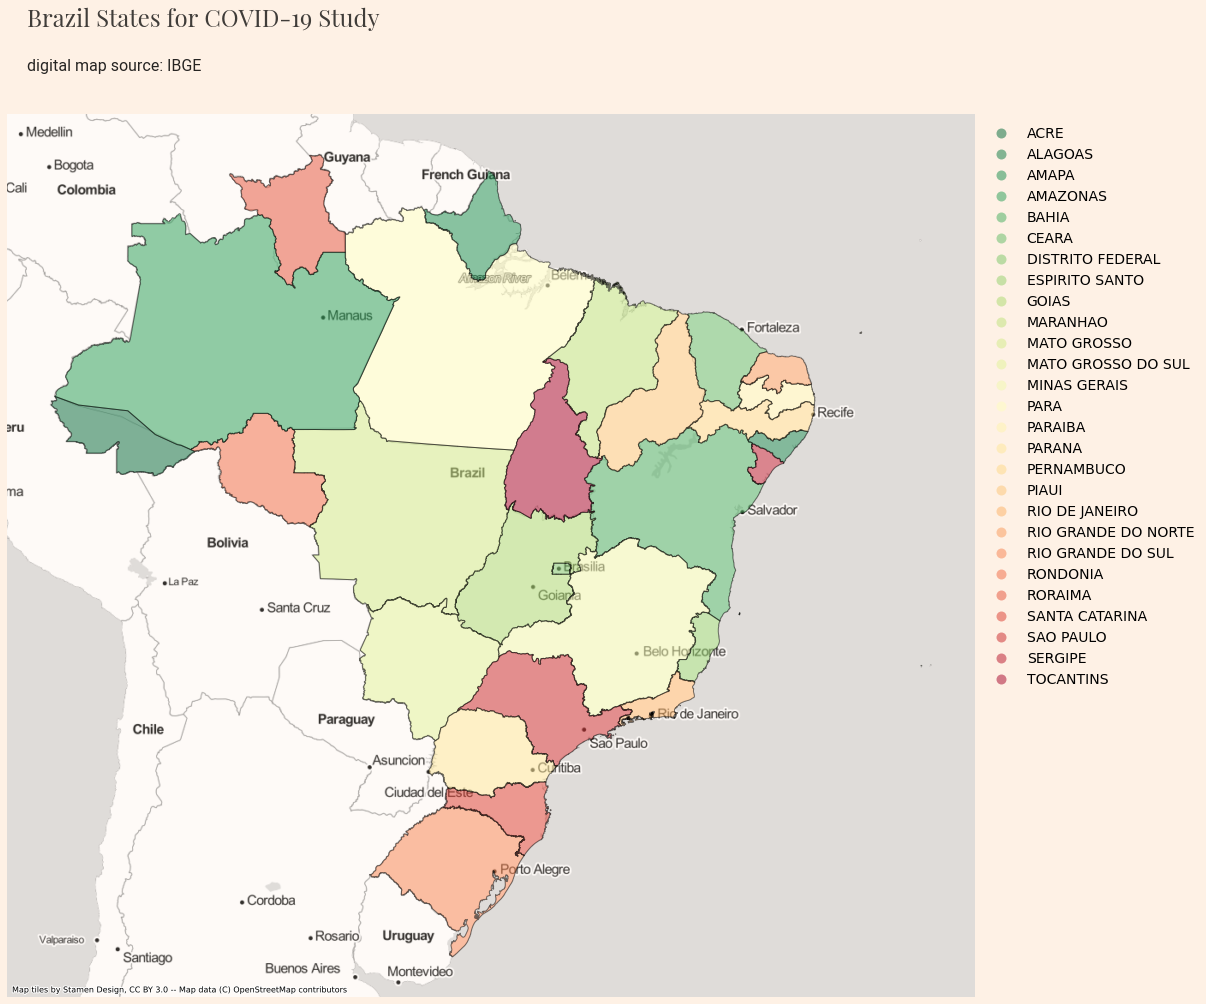

In [46]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15*1.4, 10*1.4),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax=dataSaude.plot(column='NM_ESTADO',alpha=0.5,ax=ax,legend=True,cmap='RdYlGn_r', edgecolor='k', k=10\
                 ,legend_kwds=dict(frameon=False, loc='upper left',bbox_to_anchor=(1, 1)))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=0.8)

# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Brazil States for COVID-19 Study",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)

plt.text(x = 0.02, y = 1.05,
            s = "digital map source: IBGE",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

In [47]:
states=['AC', 'AL', 'AP', 'BA', 'CE', 'DF',
       'ES', 'GO', 'MA', 'MT',
       'MS', 'MG', 'PA', 'PB',
       'PE', 'PI', 'RJ', 'RN',
       'RS', 'RR', 'SC', 'SP',
       'SE', 'TO', 'PR', 'RO', 'AM']
dataSaude['states']=pd.Series(states,index=dataSaude.index)
display(dataSaude)

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry,states
0,ACRE,NORTE,12,"POLYGON ((-8146641.462 -818823.730, -8132349.0...",AC
1,ALAGOAS,NORDESTE,27,"POLYGON ((-3948122.488 -985472.482, -3948122.1...",AL
2,AMAPA,NORTE,16,"MULTIPOLYGON (((-5586148.480 211655.546, -5585...",AP
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-4303036.945 -2042514.177, -43...",BA
4,CEARA,NORDESTE,23,"POLYGON ((-4508124.507 -310092.251, -4507518.7...",CE
5,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-5349266.664 -1746921.064, -5347355....",DF
6,ESPIRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-4496856.046 -2346881.963, -44...",ES
7,GOIAS,CENTRO-OESTE,52,"POLYGON ((-5583801.974 -1393553.197, -5583603....",GO
8,MARANHAO,NORDESTE,21,"MULTIPOLYGON (((-4897960.719 -266433.409, -489...",MA
9,MATO GROSSO,CENTRO-OESTE,51,"POLYGON ((-6449226.491 -854896.346, -6448787.0...",MT


In [48]:
def load_confirmed(start_date, state):
    dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
    df = pd.read_csv('./data/confirmados.csv',delimiter=',',parse_dates=True, date_parser=dateparse)
    y=[]
    x=[]
    for i in range(0,len(df.date)):
        y.append(df[state].values[i])
        x.append(df.date.values[i])
    df2=pd.DataFrame(data=y,index=x,columns=[""])
    df2=df2[start_date:]
    return df2

def load_dead(start_date, state):
    dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
    df = pd.read_csv('./data/mortes.csv',delimiter=',',parse_dates=True, date_parser=dateparse)
    y=[]
    x=[]
    for i in range(0,len(df.date)):
        y.append(df[state].values[i])
        x.append(df.date.values[i])
    df2=pd.DataFrame(data=y,index=x,columns=[""])
    df2=df2[start_date:]
    return df2

In [49]:
def last_nonzero(arr, axis, invalid_val=-1):
    mask = arr!=0
    val = arr.shape[axis] - np.flip(mask, axis=axis).argmax(axis=axis) - 1
    return np.where(mask.any(axis=axis), val, invalid_val)

start_date="2020-03-15"
states=sorted(states)
dataSaude=dataSaude.sort_values('states') 

infected=[]
dead=[]
dateX=[]
for state in states:
    deadX=load_dead(start_date, state).values
    date=load_dead(start_date, state).index.values
    lastDead=last_nonzero(deadX,0)[0]
    infectedX=load_confirmed(start_date, state).values
    lastInfected=last_nonzero(infectedX,0)[0]
    lastRecord=min(lastInfected,lastDead)
    infected.append(infectedX[lastRecord][0])
    dead.append(deadX[lastRecord][0])
    dateX=np.append(dateX,date[lastRecord])
    
dataSaude=dataSaude.sort_values('states')  
dataSaude['infected']=pd.Series(infected,index=dataSaude.index)
dataSaude['dead']=pd.Series(dead,index=dataSaude.index)
dataSaude['date']=pd.Series(dateX,index=dataSaude.index)

In [50]:
display(dataSaude)

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry,states,infected,dead,date
0,ACRE,NORTE,12,"POLYGON ((-8146641.462 -818823.730, -8132349.0...",AC,14688.0,394.0,2020-07-06
1,ALAGOAS,NORDESTE,27,"POLYGON ((-3948122.488 -985472.482, -3948122.1...",AL,40569.0,1172.0,2020-07-06
26,AMAZONAS,NORTE,13,"POLYGON ((-7494705.886 225993.992, -7493674.00...",AM,76427.0,2938.0,2020-07-06
2,AMAPA,NORTE,16,"MULTIPOLYGON (((-5586148.480 211655.546, -5585...",AP,30004.0,449.0,2020-07-06
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-4303036.945 -2042514.177, -43...",BA,88279.0,2168.0,2020-07-06
4,CEARA,NORDESTE,23,"POLYGON ((-4508124.507 -310092.251, -4507518.7...",CE,123394.0,6504.0,2020-07-06
5,DISTRITO FEDERAL,CENTRO-OESTE,53,"POLYGON ((-5349266.664 -1746921.064, -5347355....",DF,60383.0,726.0,2020-07-06
6,ESPIRITO SANTO,SUDESTE,32,"MULTIPOLYGON (((-4496856.046 -2346881.963, -44...",ES,54547.0,1836.0,2020-07-06
7,GOIAS,CENTRO-OESTE,52,"POLYGON ((-5583801.974 -1393553.197, -5583603....",GO,30187.0,654.0,2020-07-06
8,MARANHAO,NORDESTE,21,"MULTIPOLYGON (((-4897960.719 -266433.409, -489...",MA,90251.0,2250.0,2020-07-06


In [51]:
dfState = pd.read_csv("data/estados.csv")
dfState['id'] = dfState.index
dfState = dfState.sort_values('uf') 
dfState = dfState.reset_index()

dfState['infected']=pd.Series(infected,index=dfState.index)
dfState['infectedPlot']=pd.Series(infected,index=dfState.index)/20
dfState['dead']=pd.Series(dead,index=dfState.index)
dfState['date']=pd.Series(dateX,index=dfState.index)

gdf = gpd.GeoDataFrame(
    dfState, geometry=gpd.points_from_xy(dfState.longitude,dfState.latitude),crs=4326)

display(gdf)

,index,codigo_uf,uf,nome,latitude,longitude,id,infected,infectedPlot,dead,date,geometry
0,1,12,AC,Acre,-8.77,-70.55,1,14688.0,734.40,394.0,2020-07-06,POINT (-70.55000 -8.77000)
1,13,27,AL,Alagoas,-9.62,-36.82,13,40569.0,2028.45,1172.0,2020-07-06,POINT (-36.82000 -9.62000)
2,2,13,AM,Amazonas,-3.47,-65.10,2,76427.0,3821.35,2938.0,2020-07-06,POINT (-65.10000 -3.47000)
3,5,16,AP,Amapá,1.41,-51.77,5,30004.0,1500.20,449.0,2020-07-06,POINT (-51.77000 1.41000)
4,15,29,BA,Bahia,-13.29,-41.71,15,88279.0,4413.95,2168.0,2020-07-06,POINT (-41.71000 -13.29000)
5,9,23,CE,Ceará,-5.20,-39.53,9,123394.0,6169.70,6504.0,2020-07-06,POINT (-39.53000 -5.20000)
6,26,53,DF,Distrito Federal,-15.83,-47.86,26,60383.0,3019.15,726.0,2020-07-06,POINT (-47.86000 -15.83000)
7,17,32,ES,Espírito Santo,-19.19,-40.34,17,54547.0,2727.35,1836.0,2020-07-06,POINT (-40.34000 -19.19000)
8,25,52,GO,Goiás,-15.98,-49.86,25,30187.0,1509.35,654.0,2020-07-06,POINT (-49.86000 -15.98000)
9,7,21,MA,Maranhão,-5.42,-45.44,7,90251.0,4512.55,2250.0,2020-07-06,POINT (-45.44000 -5.42000)


In [52]:
dataSaude = dataSaude.to_crs(epsg=3857)
gdf = gdf.to_crs(epsg=3857)
plt.close()

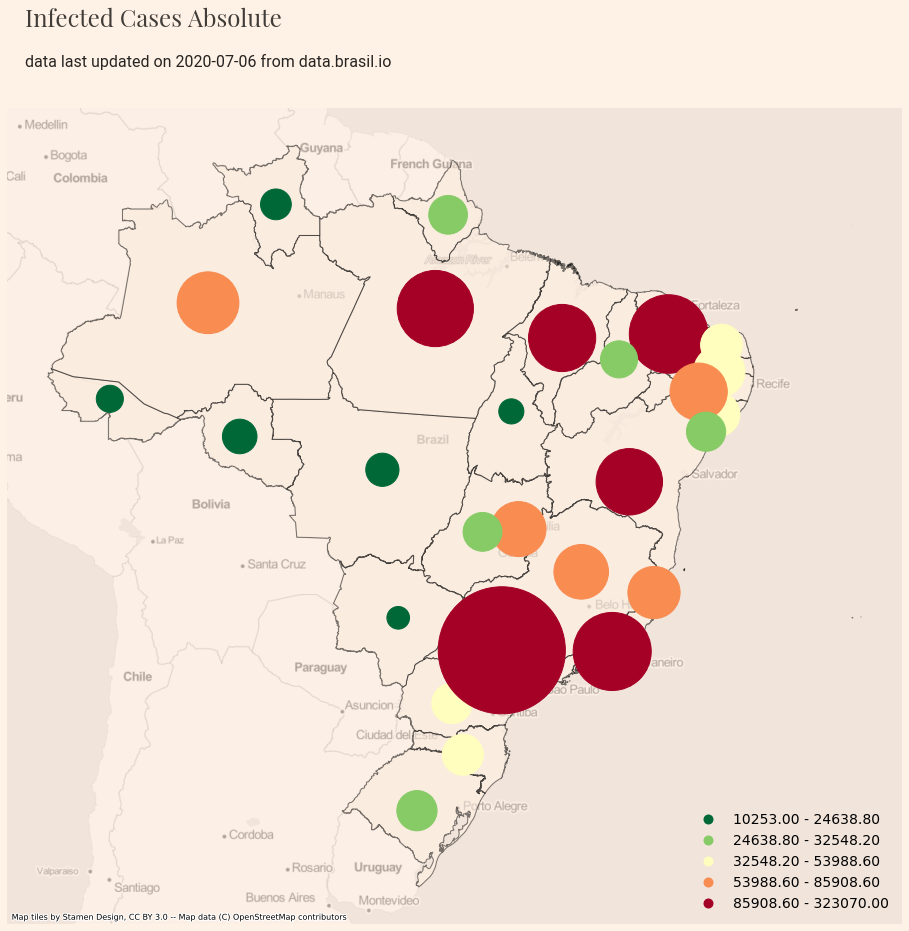

In [53]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15*1.3, 10*1.3),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax =dataSaude.plot(ax=ax, alpha=0.5, edgecolor='k', k=10, color=darker_highlight)
ax = gdf.plot(ax=ax, column='infected', cmap='RdYlGn_r', markersize='infectedPlot',scheme='quantiles',
             legend=True, legend_kwds=dict(frameon=False, loc='lower right'))
ctx.add_basemap(ax=ax,alpha=.3,source=ctx.providers.Stamen.TonerLite) #,source=ctx.providers.Stamen.TonerLite)

# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Infected Cases Absolute",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "data last updated on "+dataSaude.date.max()+" from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

In [54]:
df=df.sort_values('state') 
df_select=df.groupby(['date','state'],as_index = False).sum().pivot('date','state')

df_confirmed = df_select.fillna(0)['confirmed']
df_deaths = df_select.fillna(0)['deaths']
df_pop = df_select.fillna(0)['popEst']

df_pop = df_pop.max().to_frame().T


In [55]:
dataSaude['popEst']=pd.Series(df_pop.values[0],index=dataSaude.index)
dataSaude['infectedPerMi']=pd.Series(infected/df_pop.values[0]*1e6,index=dataSaude.index)
dataSaude['deadPerMi']=pd.Series(dead/df_pop.values[0]*1e6,index=dataSaude.index)
dataSaude['deathRatio']=pd.Series(np.array(dead)/np.array(infected),index=dataSaude.index)

In [56]:
gdf['popEst']=pd.Series(df_pop.values[0],index=gdf.index)
gdf['infectedPerMi']=pd.Series(infected/df_pop.values[0]*1e6,index=gdf.index)
gdf['deadPerMi']=pd.Series(dead/df_pop.values[0]*1e6,index=gdf.index)
gdf['deathRatio']=pd.Series(np.array(dead)/np.array(infected)*100,index=gdf.index)
gdf['deathRatioPlot']=pd.Series(np.array(dead)/np.array(infected)*100,index=gdf.index)*1000
gdf['deadPerMiPlot']=pd.Series(dead/df_pop.values[0]*1e6,index=gdf.index)*20
gdf['infectedPerMiPlot']=pd.Series(infected/df_pop.values[0]*1e6,index=gdf.index)

display(gdf)

,index,codigo_uf,uf,nome,latitude,longitude,id,infected,infectedPlot,dead,date,geometry,popEst,infectedPerMi,deadPerMi,deathRatio,deathRatioPlot,deadPerMiPlot,infectedPerMiPlot
0,1,12,AC,Acre,-8.77,-70.55,1,14688.0,734.40,394.0,2020-07-06,POINT (-7853590.075 -980106.597),881935.0,16654.288581,446.744942,2.682462,2682.461874,8934.898830,16654.288581
1,13,27,AL,Alagoas,-9.62,-36.82,13,40569.0,2028.45,1172.0,2020-07-06,POINT (-4098783.651 -1075960.783),3337357.0,12156.026460,351.176095,2.888905,2888.905322,7023.521907,12156.026460
2,2,13,AM,Amazonas,-3.47,-65.10,2,76427.0,3821.35,2938.0,2020-07-06,POINT (-7246898.851 -386514.986),4144597.0,18440.152324,708.874711,3.844191,3844.191189,14177.494217,18440.152324
3,5,16,AP,Amapá,1.41,-51.77,5,30004.0,1500.20,449.0,2020-07-06,POINT (-5763010.038 156976.327),845731.0,35477.001553,530.901670,1.496467,1496.467138,10618.033394,35477.001553
4,15,29,BA,Bahia,-13.29,-41.71,15,88279.0,4413.95,2168.0,2020-07-06,POINT (-4643135.961 -1492883.605),14873064.0,5935.495201,145.766871,2.455850,2455.850202,2915.337418,5935.495201
5,9,23,CE,Ceará,-5.20,-39.53,9,123394.0,6169.70,6504.0,2020-07-06,POINT (-4400459.471 -579657.659),9132078.0,13512.149152,712.214679,5.270921,5270.920790,14244.293577,13512.149152
6,26,53,DF,Distrito Federal,-15.83,-47.86,26,60383.0,3019.15,726.0,2020-07-06,POINT (-5327750.829 -1785044.155),3015268.0,20025.748955,240.774618,1.202325,1202.325158,4815.492354,20025.748955
7,17,32,ES,Espírito Santo,-19.19,-40.34,17,54547.0,2727.35,1836.0,2020-07-06,POINT (-4490628.259 -2177318.158),4018650.0,13573.463725,456.869844,3.365905,3365.904633,9137.396887,13573.463725
8,25,52,GO,Goiás,-15.98,-49.86,25,30187.0,1509.35,654.0,2020-07-06,POINT (-5550389.811 -1802406.770),7018354.0,4301.150954,93.184242,2.166496,2166.495511,1863.684847,4301.150954
9,7,21,MA,Maranhão,-5.42,-45.44,7,90251.0,4512.55,2250.0,2020-07-06,POINT (-5058357.662 -604253.513),7075181.0,12755.998751,318.013066,2.493047,2493.047168,6360.261313,12755.998751


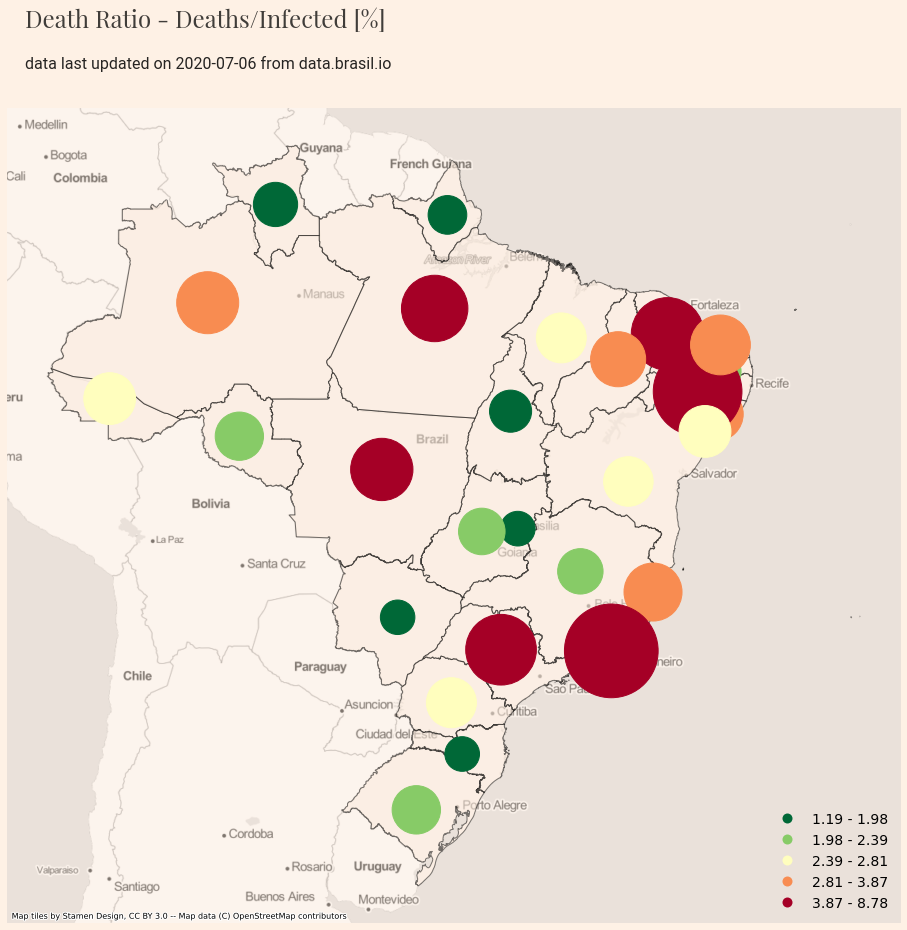

In [57]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15*1.3, 10*1.3),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax =dataSaude.plot(ax=ax, alpha=0.5, edgecolor='k', k=10, color=darker_highlight)
ax = gdf.plot(ax=ax, column='deathRatio', cmap='RdYlGn_r', markersize='deathRatioPlot',scheme='quantiles',
             legend=True, legend_kwds=dict(frameon=False, loc='lower right'))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=.5)


# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Death Ratio - Deaths/Infected [%]",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "data last updated on "+dataSaude.date.max()+" from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

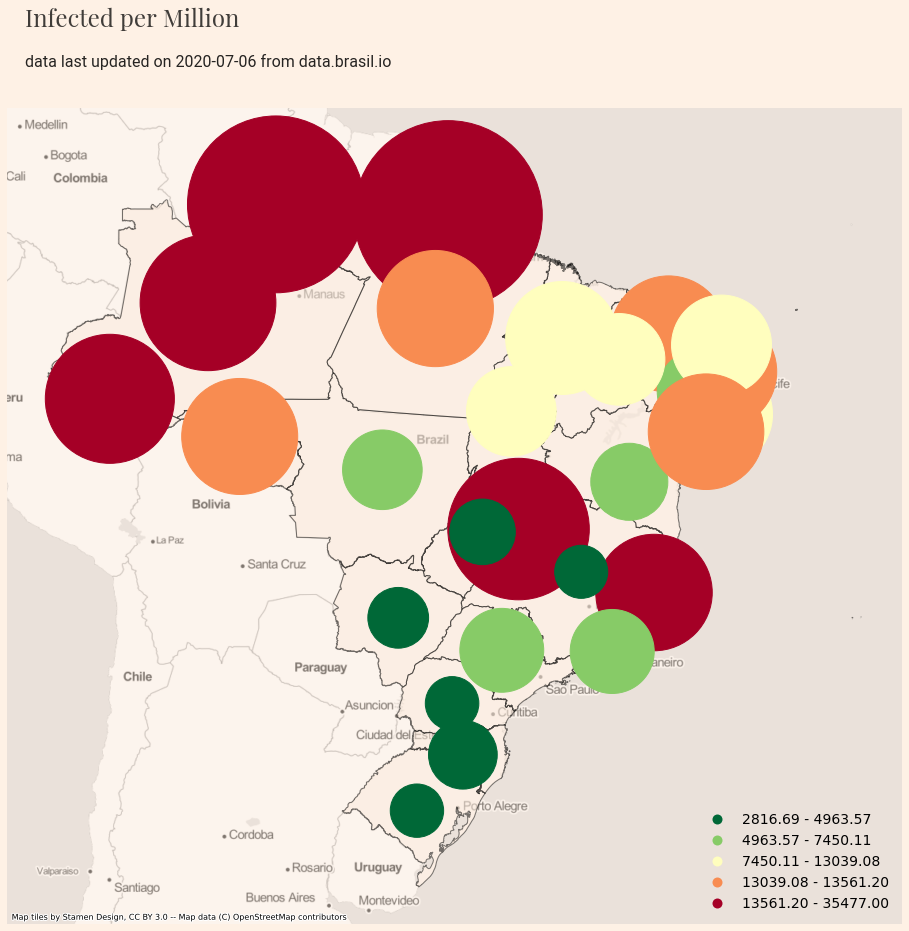

In [58]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15*1.3, 10*1.3),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax =dataSaude.plot(ax=ax, alpha=0.5, edgecolor='k', k=10, color=darker_highlight)
ax = gdf.plot(ax=ax, column='infectedPerMi', cmap='RdYlGn_r', markersize='infectedPerMiPlot',scheme='quantiles',
             legend=True, legend_kwds=dict(frameon=False, loc='lower right'))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=.5)


# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Infected per Million",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "data last updated on "+dataSaude.date.max()+" from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

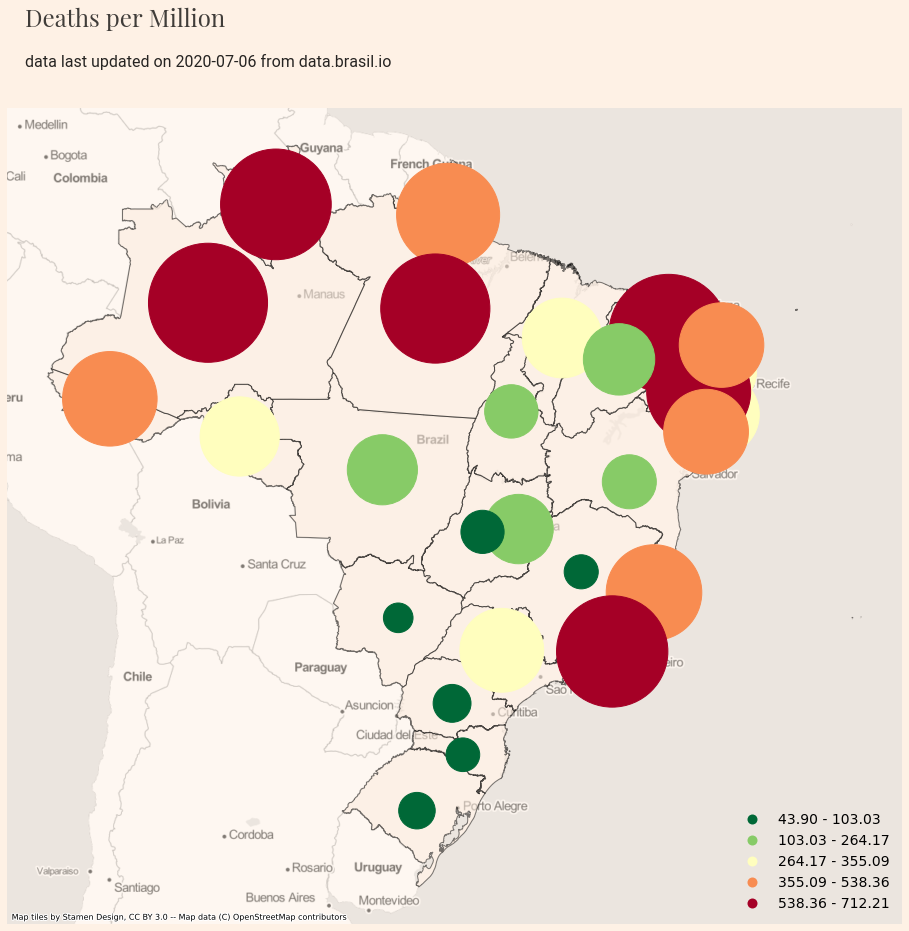

In [59]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15*1.3, 10*1.3),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


ax =dataSaude.plot(ax=ax, alpha=0.5, edgecolor='k', k=10, color=darker_highlight)
ax = gdf.plot(ax=ax, column='deadPerMi', cmap='RdYlGn_r', markersize='deadPerMiPlot',scheme='quantiles',
             legend=True, legend_kwds=dict(frameon=False, loc='lower right'))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=.5)


ax.set_axis_off()
# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Deaths per Million",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "data last updated on "+dataSaude.date.max()+" from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

In [60]:
# 3857
gdf['geometry']=dataSaude.geometry
gdf=gdf.to_crs(epsg=3857)


display(gdf)

,index,codigo_uf,uf,nome,latitude,longitude,id,infected,infectedPlot,dead,date,geometry,popEst,infectedPerMi,deadPerMi,deathRatio,deathRatioPlot,deadPerMiPlot,infectedPerMiPlot
0,1,12,AC,Acre,-8.77,-70.55,1,14688.0,734.40,394.0,2020-07-06,"POLYGON ((-8146641.462 -818823.730, -8132349.0...",881935.0,16654.288581,446.744942,2.682462,2682.461874,8934.898830,16654.288581
1,13,27,AL,Alagoas,-9.62,-36.82,13,40569.0,2028.45,1172.0,2020-07-06,"POLYGON ((-3948122.488 -985472.482, -3948122.1...",3337357.0,12156.026460,351.176095,2.888905,2888.905322,7023.521907,12156.026460
2,2,13,AM,Amazonas,-3.47,-65.10,2,76427.0,3821.35,2938.0,2020-07-06,"MULTIPOLYGON (((-5586148.480 211655.546, -5585...",4144597.0,18440.152324,708.874711,3.844191,3844.191189,14177.494217,18440.152324
3,5,16,AP,Amapá,1.41,-51.77,5,30004.0,1500.20,449.0,2020-07-06,"MULTIPOLYGON (((-4303036.945 -2042514.177, -43...",845731.0,35477.001553,530.901670,1.496467,1496.467138,10618.033394,35477.001553
4,15,29,BA,Bahia,-13.29,-41.71,15,88279.0,4413.95,2168.0,2020-07-06,"POLYGON ((-4508124.507 -310092.251, -4507518.7...",14873064.0,5935.495201,145.766871,2.455850,2455.850202,2915.337418,5935.495201
5,9,23,CE,Ceará,-5.20,-39.53,9,123394.0,6169.70,6504.0,2020-07-06,"POLYGON ((-5349266.664 -1746921.064, -5347355....",9132078.0,13512.149152,712.214679,5.270921,5270.920790,14244.293577,13512.149152
6,26,53,DF,Distrito Federal,-15.83,-47.86,26,60383.0,3019.15,726.0,2020-07-06,"MULTIPOLYGON (((-4496856.046 -2346881.963, -44...",3015268.0,20025.748955,240.774618,1.202325,1202.325158,4815.492354,20025.748955
7,17,32,ES,Espírito Santo,-19.19,-40.34,17,54547.0,2727.35,1836.0,2020-07-06,"POLYGON ((-5583801.974 -1393553.197, -5583603....",4018650.0,13573.463725,456.869844,3.365905,3365.904633,9137.396887,13573.463725
8,25,52,GO,Goiás,-15.98,-49.86,25,30187.0,1509.35,654.0,2020-07-06,"MULTIPOLYGON (((-4897960.719 -266433.409, -489...",7018354.0,4301.150954,93.184242,2.166496,2166.495511,1863.684847,4301.150954
9,7,21,MA,Maranhão,-5.42,-45.44,7,90251.0,4512.55,2250.0,2020-07-06,"POLYGON ((-6449226.491 -854896.346, -6448787.0...",7075181.0,12755.998751,318.013066,2.493047,2493.047168,6360.261313,12755.998751


In [61]:
from IPython.display import IFrame
from IPython.core.display import display, HTML
HTML("<style> @import url('https://fonts.googleapis.com/css2?family=Playfair+Display&family=Roboto&display=swap');</style>")


In [62]:
import json
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default='notebook'

geodf = gpd.read_file('br_unidades_da_federacao/BRUFE250GC_SIR.shp')
geodf.to_file("br_unidades_da_federacao/estados.json", driver = "GeoJSON")
with open("br_unidades_da_federacao/estados.json") as geofile:
    jdata = json.load(geofile)

for k in range(len(jdata['features'])):
    jdata['features'][k]['id'] = k

print(jdata['features'][0].keys())
print(jdata['features'][0]['properties'])

def figMap(jdata):
    fig=go.Figure(go.Choroplethmapbox(geojson=jdata, locations=gdf['id'],showlegend=False,showscale=False,
                                    z=gdf['id'],colorscale=["white","gray"], #,"black"],
                                    marker_opacity=0.2, marker_line_width=1.5))
    
    fig.update_layout( mapbox_style="carto-positron", 
                      mapbox_zoom=3.2*1.25,     
       mapbox_center = {"lat": (gdf.latitude.max()+gdf.latitude.min())/2, \
                 "lon": (gdf.longitude.max()+gdf.longitude.min())/2},
        geo=dict(showland=False,
            lataxis=dict(range=[gdf.latitude.min(), gdf.latitude.max()]),
            lonaxis=dict(range=[gdf.longitude.min(), gdf.longitude.max()]),
            scope="south america",
            ),
            paper_bgcolor=color_bg,
            plot_bgcolor="gray",
            width=800*1.3,
            height=700*2,
            showlegend=False)
    
#     fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout( mapbox_style="light", \
                      mapbox_accesstoken='pk.eyJ1IjoiZ2FzaWx2YTE5NzMiLCJhIjoiY2tjNTNiaXdjMGR5MjJybzZzdHU2bjFrMSJ9.Ni_co0QEn1WVVfefOkbRBg')


    return fig


dict_keys(['type', 'properties', 'geometry', 'id'])
{'NM_ESTADO': 'ACRE', 'NM_REGIAO': 'NORTE', 'CD_GEOCUF': '12'}


In [63]:
def figPlot(jdata,gdf,propMap,titlePlot,simulation=False):
    
    fig=figMap(jdata)

    fig.add_trace(go.Scattermapbox(
            lat=gdf.latitude,
            lon=gdf.longitude, #size_max=50,
            mode='markers',
            marker=go.scattermapbox.Marker(
                showscale=True, 
                size=abs(gdf[propMap]),
                sizemode='area',
                sizeref=0.5*max(gdf[propMap])/(40.**2),
                sizemin=4,
                color = gdf[propMap],
                colorscale = ["green","yellow","orange","red"]
            ),
            text=gdf.uf,
        ))
    
#     fig.update_layout(mapbox_style="light", \
#                       mapbox_accesstoken='pk.eyJ1IjoiZ2FzaWx2YTE5NzMiLCJhIjoiY2tjNTNiaXdjMGR5MjJybzZzdHU2bjFrMSJ9.Ni_co0QEn1WVVfefOkbRBg')

    fig.update_geos(fitbounds="locations",visible=False, 
                    resolution=110,
                    showcountries=True, countrycolor="Black",
                    showsubunits=False, subunitcolor="Black")

#     fig.update_layout(mapbox_style="light") #"stamen-terrain") #"open-street-map")

    fig.update_layout(
        geo=dict(
            lataxis=dict(range=[gdf.latitude.min()-3, gdf.latitude.max()+3]),
            lonaxis=dict(range=[gdf.longitude.min()-20, gdf.longitude.max()+1]),
            scope="south america",
            showland = True,
            landcolor = darker_highlight,
            showcoastlines=True, coastlinecolor="RebeccaPurple",
            showocean=True, oceancolor=darker_highlight,
            showlakes=True, lakecolor="Blue",
            showrivers=True, rivercolor="Blue",
            framecolor=darker_highlight,
            ),
            plot_bgcolor="gray",
            width=800*1.3,
            height=700*2,
    )
    
    if simulation:
        strTitle="SEAIRD Model Results for Covid-19 - "+titlePlot
        strSub="Situation for the day "+str(gdf.date.max())
        model='Model'
    else:
        strTitle="Brazil States Covid-19 "+titlePlot
        strSub='Last updated from data.brasil.io on '+str(gdf.date.max()) 
        model=""     
        
    fig.update_layout(title=go.layout.Title(text=strTitle, 
                font=dict(
                family="Playfair Display, serif",
                size=24 )))
    
    fig.update_layout(annotations=[
       go.layout.Annotation(
            showarrow=False,
            text=strSub,
            xanchor='left',
            x=-.033,
#             xshift=275,
            yanchor='top',
             y=1.035,
            font=dict(
                family='Roboto, sans-serif',
                size=16            )
        )])

    fig.layout.plot_bgcolor = darker_highlight
    fig.layout.paper_bgcolor = color_bg

    fig['layout']['xaxis'].update(side='top')

    fig.write_html('results/'+propMap+model+'.html') #, auto_open=True)
    
#     fig.write_image('results/'+propMap+'.png',scale=1.2)
#     fig.show("notebook")

#     iplot(fig) 


In [64]:
display(HTML("<style>.container { width:90% !important; }</style>"))

In [65]:
figPlot(jdata,gdf,propMap="deathRatio",titlePlot="Death Ratio [%]")
IFrame(src='results/deathRatio.html', width=800*1.3, height=700*2)

In [66]:
figPlot(jdata,gdf,propMap="deadPerMi",titlePlot="Deaths per Million")
IFrame(src='results/deadPerMi.html', width=800*1.3, height=700*2)

In [67]:
figPlot(jdata,gdf,propMap="infectedPerMi",titlePlot="Infected per Million")
IFrame(src='results/infectedPerMi.html', width=800*1.3, height=700*2)


In [68]:
# SEAIRD_SP7.pkl

def loadDataFrame(filename):
    df= pd.read_pickle(filename)
    df.columns = [c.lower().replace(' ', '_') for c in df.columns]
    df.columns = [c.lower().replace('(', '') for c in df.columns]
    df.columns = [c.lower().replace(')', '') for c in df.columns]
    return df

In [69]:
dfparam = pd.read_csv("data/param.csv")
dfparam = dfparam.dropna()
display(dfparam)
states=dfparam.state
display(states)

version="8"
date="2020-08-06"

import pandas as pd

dfResults = pd.DataFrame()
data = []
columns = ['date','id','uf','infected','deaths','popEst','infectedPerMi',
           'deathsPerMi','deathRatio','latitude','longitude']

for state in states:
    df = loadDataFrame('./data/SEAIRD_'+state+version+'.pkl')    
    df=df[df.index==date]
    
    values = [date, gdf[gdf.uf==state].id.values[0],state, df.infected.values[0], 
             df.deaths.values[0],gdf[gdf.uf==state].popEst.values[0],
             df.infected.values[0]/gdf[gdf.uf==state].popEst.values[0]*1e6,
             df.deaths.values[0]/gdf[gdf.uf==state].popEst.values[0]*1e6,
             np.divide(df.deaths.values[0],df.infected.values[0])*100,
             gdf[gdf.uf==state].latitude.values[0],
             gdf[gdf.uf==state].longitude.values[0]
             ]
    zipped = zip(columns, values)
    a_dictionary = dict(zipped)
    data.append(a_dictionary)
    
dfResults = dfResults.append(data, True)

display(dfResults)

,state,start-date,prediction-range,s0,e0,a0,i0,r0,d0,START,RATIO,WCASES,WREC
0,SP,2020-03-15,200,8000000.0,0,0,800,300,250,100,0.15,0.55,0.01
1,ES,2020-04-01,200,475000.0,0,0,50,250,50,100,0.15,0.65,0.01
2,MG,2020-04-01,200,1100000.0,0,0,200,250,40,100,0.15,0.55,0.01
3,RJ,2020-03-20,200,700000.0,0,0,800,250,50,100,0.15,0.50,0.01
4,CE,2020-03-20,200,800000.0,0,0,800,250,50,100,0.15,0.50,0.01
5,PE,2020-03-20,200,700000.0,0,0,800,250,100,100,0.15,0.50,0.01
6,AM,2020-03-20,200,700000.0,0,0,800,250,100,100,0.15,0.50,0.01
7,PA,2020-03-20,200,700000.0,0,0,800,250,100,100,0.15,0.50,0.01
8,PI,2020-03-20,200,700000.0,0,0,800,250,100,100,0.15,0.50,0.01
9,RR,2020-03-20,200,700000.0,0,0,800,250,100,100,0.15,0.50,0.01


0     SP
1     ES
2     MG
3     RJ
4     CE
5     PE
6     AM
7     PA
8     PI
9     RR
10    AP
Name: state, dtype: object

,date,id,uf,infected,deaths,popEst,infectedPerMi,deathsPerMi,deathRatio,latitude,longitude
0,2020-08-06,19,SP,264356.460331,34499.534072,45919049.0,5757.010785,751.312033,13.050384,-22.19,-48.79
1,2020-08-06,17,ES,47895.230593,5199.230089,4018650.0,11918.238860,1293.775295,10.855423,-19.19,-40.34
2,2020-08-06,16,MG,76475.495724,4464.211585,21168791.0,3612.652972,210.886469,5.837441,-18.10,-44.38
3,2020-08-06,18,RJ,84994.019175,28348.474629,17264943.0,4922.924980,1641.967461,33.353493,-22.25,-42.66
4,2020-08-06,9,CE,75335.827645,17941.088346,9132078.0,8249.582148,1964.622767,23.814815,-5.20,-39.53
5,2020-08-06,12,PE,52442.805052,11201.437601,9557071.0,5487.330276,1172.057590,21.359341,-8.38,-37.86
6,2020-08-06,2,AM,61326.525406,5532.905115,4144597.0,14796.740288,1334.968180,9.022042,-3.47,-65.10
7,2020-08-06,4,PA,86425.841789,16871.148129,8602865.0,10046.169711,1961.108088,19.520953,-3.79,-52.48
8,2020-08-06,8,PI,37280.911313,2770.395134,3273227.0,11389.650431,846.380387,7.431136,-6.60,-42.28
9,2020-08-06,3,RR,34205.704264,1672.941498,605761.0,56467.326659,2761.718727,4.890826,1.99,-61.33


In [70]:
figPlot(jdata,dfResults,propMap="infectedPerMi",titlePlot="Infected per Million",simulation=True)
IFrame(src='results/infectedPerMiModel.html', width=800*1.3, height=700*2)

In [71]:
figPlot(jdata,dfResults,propMap="deathsPerMi",titlePlot="Deaths per Million",simulation=True)
IFrame(src='results/deathsPerMiModel.html', width=800*1.3, height=700*2)

In [72]:
figPlot(jdata,dfResults,propMap="deathRatio",titlePlot="Death Ratio[%]",simulation=True)
IFrame(src='results/deathRatioModel.html', width=800*1.3, height=700*2)